<a href="https://colab.research.google.com/github/SohamGhorpade326/Employee_salary_prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Logistic Regression ---
Accuracy: 0.8513
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.74      0.60      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.84      0.85      0.85      9045



--- Decision Tree ---
Accuracy: 0.8136
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6842
           1       0.62      0.61      0.61      2203

    accuracy                           0.81      9045
   macro avg       0.75      0.74      0.75      9045
weighted avg       0.81      0.81      0.81      9045



--- Random Forest ---
Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.73      0.62      0.67      2203

    accuracy                           0.85      9045
 

/tmp/ipython-input-1-2541341865.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


--- Model Comparison ---
                    Model  Accuracy
4       Gradient Boosting  0.868878
3  Support Vector Machine  0.860144
2           Random Forest  0.852515
0     Logistic Regression  0.851299
5     K-Nearest Neighbors  0.829519
1           Decision Tree  0.813599


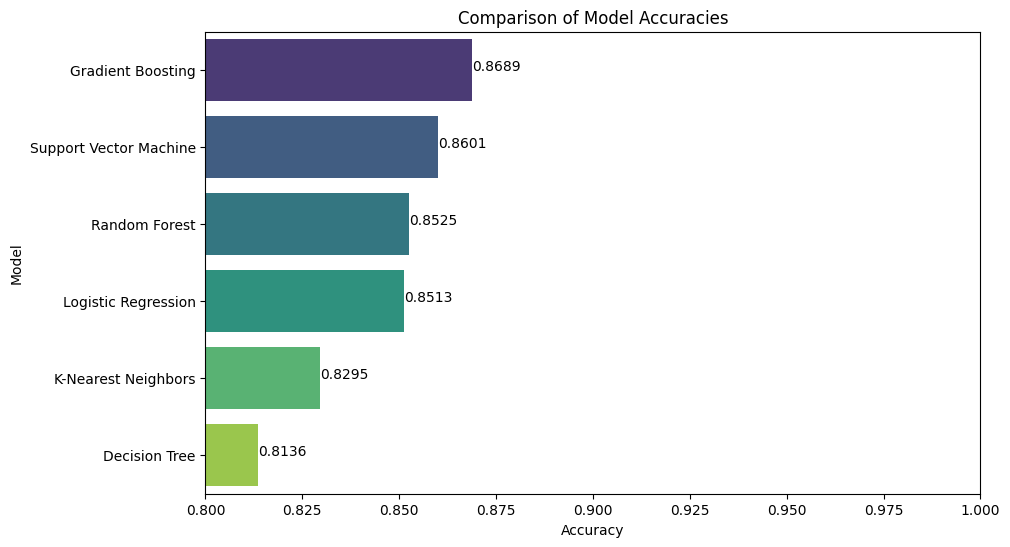

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/content/adult 3.csv')

# --- 1. Data Analysis and Preprocessing ---

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Separate target variable (y) from features (X)
X = df.drop('income', axis=1)
y = df['income']

# Convert target variable to binary
y = y.apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 2. Model Training and Evaluation ---

# Define the models to be trained
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Create the full pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print classification report
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")


# --- 3. Model Comparison ---

# Create a DataFrame with the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies')
plt.xlim(0.8, 1.0)
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value, index, f'{value:.4f}')

plt.savefig('model_comparison.png')

print("--- Model Comparison ---")
print(results_df)